In [57]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [146]:
results = pd.read_csv("wikipedia.csv")

for excluded_word in ["identifier", "Help", "Dictionary", "language", "Main_Page", "Wayback"]:
    for column in ["source", "page"]:
        results = results[np.invert(results[column].str.contains(excluded_word))]
results

,source,page
0,Penguin,Penguin_(disambiguation)
1,Penguin,Danian
2,Penguin,Holocene
3,Penguin,Megaannum
4,Penguin,Precambrian
...,...,...
12504,Northern_Hemisphere,Western_Hemisphere
12505,Northern_Hemisphere,Land_and_water_hemispheres
12506,Northern_Hemisphere,Land_and_water_hemispheres
12511,Northern_Hemisphere,Northern_Hemisphere


In [147]:
results["count"] = results.groupby("page").transform(len)

In [148]:
results = results[results["count"] > 12]
results = results[np.invert(results["page"].str.contains("identifier"))]

In [149]:
G = nx.from_pandas_edgelist(results, source = "source", target = "page")

In [150]:
ranks = nx.pagerank(G)

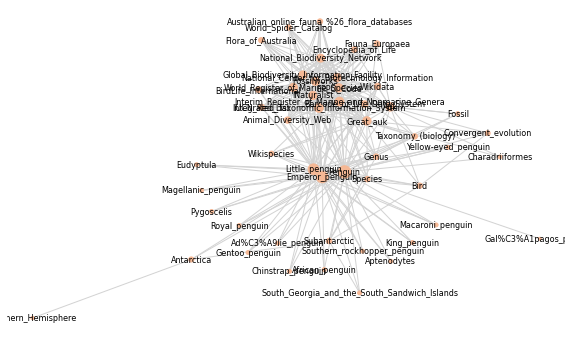

In [151]:
fig, ax = plt.subplots(1, figsize = (10, 6))
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, 
        pos, 
        node_size= 2000*np.array([ranks[v] for v in G.nodes()]), 
        with_labels = True, 
        edge_color="lightgrey",
        font_size = 8,
        node_color = "#F5B895",
        arrows = True)